In [ ]:
!pip install scikit-multilearn

In [472]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [554]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection import IterativeStratification
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Parte 1: explorando o dataset

In [329]:
# Carregando os dados para análise e treinamento do modelo

df = pd.read_csv("sample_data/bootcamp_train.csv")

In [330]:
# Verificando inicialmente os dados que eu tenho para treinar meu modelo

df.head()

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


In [331]:
linhas, colunas = df.shape
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 35260
Colunas: 15


In [332]:
df["tipo"].unique()

array(['L', 'M', 'H'], dtype=object)

In [333]:
df["temperatura_ar"].unique()

array([298.3, 298.2, 300.9, -36. , 300.5, 300.8, 301.7, 298.5, 301.5,
       298.4, 299. ,   nan, 299.1, 300.1, 299.9, 298.8, 303. , 301.1,
       303.5, 297.5, 303.6, 300. , 298.7, 297.9, 303.1, 302.3, 302. ,
       300.4, 302.5, 302.2, 297.7, 298.6, 304.2, 301.9, 297.4, 302.6,
       301.3, 297.6, 299.5, 296.9, 297. , 302.9, 298. , 302.4, 300.6,
       298.9, 300.3, 300.7, 303.7, 299.3, 298.1, 299.4, 296.8, 303.9,
       303.2, 302.8, 299.2, 301.2, 297.1, 297.8, 304. , 296.7, 301. ,
       300.2, 297.2, 297.3, 296.5, 299.8, 301.8, 304.1, 299.6, 301.6,
       299.7, 301.4, 302.7, 303.3, 296.1, 295.6, 296.2, 304.3, 303.8,
       296.3, 303.4, 296.4, 296.6, 302.1, 295.8, 295.7, 295.3, 304.4,
       295.9, 296. , 304.5, 295.5, 295.4])

In [334]:
df["temperatura_processo"].unique()

array([309.1, 308.4, 307.8, 310.8, 310.5, 308.8, 311.7, 310.9, 308.2,
       311.1, 308.3, 308.7, 310.3, 309.6, 311.3, 309.8, 311.2, 309. ,
       310.1, 307.5, 309.2, 312.9, 308. , 312.4, 311.4, 309.5, 309.3,
       308.6,   nan, 310.4, 311.5, 311.8, -38. , 313.4, 310.2, 307.7,
       307.9, 312.5, 309.4, 310. , 309.9, 312.2, 309.7, 313. , 308.9,
       308.1, 310.7, 312.7, 307.6, 311. , 308.5, 313.2, 311.9, 310.6,
       312.6, 313.6, 313.3, 312.1, 311.6, 307.2, 312. , 312.3, 306.8,
       306.2, 313.1, 313.5, 307.3, 307.4, 306.5, 306.4, 312.8, 306.9,
       306.3, 307.1, 305.8, 306.6, 306.1, 306.7, 313.7, 305.9, 313.8,
       306. , 307. , 305.7])

In [335]:
df["umidade_relativa"].unique()

array([90.        , 91.27828143, 80.59042913, 84.20641303, 83.72794436,
       84.89354336, 84.42357674, 86.77818585, 91.97228611, 82.82889498,
       90.01361185, 91.13267032, 84.94024271, 83.00966881, 89.60428051,
       89.31790366, 92.06761817, 87.29110611, 90.36566817, 84.38512738,
       85.95078675, 90.88433717, 84.90272928, 80.74763975, 85.57558417,
       86.79241707, 88.68525285, 92.53413058, 84.74642131, 91.57964119,
       94.00727944, 91.02282809, 84.04047455, 94.57525626, 93.79666187,
       85.24209952])

In [336]:
df["velocidade_rotacional"].unique()

array([1616., 1388., 1528., 1599., 1571., -161., 1469., 1655., 1608.,
       1654., 1459., 1433., 1706., 1582.,   nan, 1535., 1509., 1735.,
       1408., 1353., 1295., 1666., 1332., 1927., 1610., 1523., 1658.,
       1477., 1418., 1483., 1343., 1530., 1831., 1439., 1384., 1667.,
       1572., 1419., 1280., 1896., 1499., 1485., 1644., 1457., 1551.,
       1462., 1486., 1413., 1516., 1622., 1965., 1550., 1686., 1683.,
       1504., 1781., 1585., 1570., 1847., 1811., 1410., 1434., 1430.,
       1480., 1694., 1802., 1502., 1836., 1989., 1843., 1339., 1394.,
       1878., 1491., 2083., 1775., 1467., 1533., 1468., 1208., 1858.,
       1414., 1698., 1520., 1607., 1665., 1800., 1518., 1588., 1436.,
       1988., 1526., 1416., 1424., 1529., 1624., 1373., 1584., 1612.,
       1601., 1716., 1402., 1233., 1380., 1500., 1632., 1641., 1823.,
       1886., 1730., 1553., 1454., 1429., 1390., 1506., 1820., 1498.,
       1473., 1670., 1737., 1563., 1918., 1531., 1392., 1512., 1618.,
       1510., 2194.,

In [337]:
df["torque"].unique()

array([31.1 , 53.8 , 33.  , 33.9 , 47.4 , 44.1 , 32.2 , 27.1 , 45.1 ,
       62.3 , 28.6 , 46.7 , 38.1 , 36.2 , 26.1 , 45.4 , 57.8 , 58.9 ,
       27.2 , 51.1 , 22.4 , 32.4 , 36.1 , 30.4 , 30.  , 39.  , 46.  ,
       45.6 , 53.6 , 40.9 ,   nan, 42.8 , 33.1 , 41.8 , 54.4 , 34.6 ,
       41.5 , 57.3 , 36.3 , 29.2 , 62.4 , 24.5 , 42.9 , 31.7 , 49.  ,
       49.7 , 36.4 , 42.  , 40.4 , 51.2 , 37.9 , 20.4 , 52.3 , 39.7 ,
       28.8 , 46.1 , 32.1 , 24.9 , 35.6 , 23.6 , 24.7 , 48.8 , 47.3 ,
       57.  , 45.7 , 26.9 , 38.5 , 22.8 , 22.3 , 25.8 , 48.2 , 45.2 ,
       24.3 , 44.9 , 18.2 , 26.6 , 34.9 , 44.7 , 35.9 , 46.2 , 31.6 ,
       32.8 , 28.1 , 37.  , 33.7 , 27.9 , 39.4 , 31.4 , 39.9 , 37.6 ,
       43.5 , 19.7 , 37.3 , 41.2 , 41.4 , 29.8 , 47.2 , 34.4 , 49.5 ,
       40.  , 59.  , 51.6 , 36.7 , 36.6 , 53.9 , 32.5 , 31.9 , 23.9 ,
       25.1 , 44.4 , 27.5 , 43.  , 39.8 , 55.7 , 43.7 , 45.8 , 34.  ,
       22.9 , 24.6 , 44.  , 42.1 , 45.5 , 27.  , 31.2 , 44.3 , 59.3 ,
       21.6 , 36.  ,

In [338]:
df["desgaste_da_ferramenta"].unique()

array([ 195.,  137.,   nan,    7.,   56.,  150.,   12., -202.,   13.,
         97.,   20.,  206.,  193.,   84.,  113.,   57.,  194.,   98.,
         89.,   77.,  121.,  149.,  126.,  130.,    3.,  127.,  128.,
        187.,   42.,   50.,  109.,   96.,   44.,   92.,   17.,  105.,
        147.,   21.,   49.,   31.,  186.,  185.,   38.,   23.,  211.,
        132.,  160.,  221.,   48.,   79.,  164.,   54.,  124.,  173.,
         85.,   58.,   70.,  138.,   69.,   27.,   43.,  200.,   83.,
         52.,   18.,   86.,  122.,   24.,  115.,  181.,  204.,   10.,
         28.,  101.,   65.,   39.,  190.,    0.,  158.,  146.,  202.,
         47.,  136.,  131.,  165.,  140.,    9.,   94.,   81.,  184.,
        112.,   87.,   55.,  209.,   91.,  104.,  178.,  155.,  225.,
        172.,  219.,  163.,   51.,  108.,  192.,  201.,  174.,   61.,
        179.,  188.,  142.,  153.,  116.,   68.,    8.,   46.,   37.,
        154.,   82.,   19.,  177.,  141.,  111.,  117.,   63.,  139.,
        213.,   95.,

In [339]:
df["falha_maquina"].unique()

array(['não', 'Não', 'sim', 'N', '0', 'Sim', 'y', '1'], dtype=object)

In [340]:
df["FDF (Falha Desgaste Ferramenta)"].unique()

array(['False', 'N', '0', 'True', '-', '1'], dtype=object)

In [341]:
df["FDC (Falha Dissipacao Calor)"].unique()

array(['False', 'nao', '0', 'True', 'y', '1'], dtype=object)

In [342]:
df["FP (Falha Potencia)"].unique()

array(['Não', 'não', 'Sim', 'N', '0', 'sim', '1', 'y'], dtype=object)

In [343]:
df["FTE (Falha Tensao Excessiva)"].unique()

array([False,  True])

In [344]:
df["FA (Falha Aleatoria)"].unique()

array(['Não', 'não', '0', '-', 'Sim', 'sim', '1'], dtype=object)

In [345]:
# Verificar os valores mínimos e máximos de cada atributo

df.agg(["min", "max"])

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
min,0,H29424,H,-36.0,-38.0,80.590429,-161.0,3.8,-202.0,0,-,0,0,False,-
max,35259,M24859,M,304.5,313.8,94.575256,2886.0,76.6,253.0,y,True,y,y,True,sim


In [346]:
# Verificar quantidade de valores únciso na coluna "id_produto"

df["id_produto"].nunique()

9708

In [347]:
df.head()

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


In [348]:
df["tipo"].isna().sum()

np.int64(0)

In [349]:
df["temperatura_ar"].isna().sum()

np.int64(616)

In [350]:
df["temperatura_processo"].isna().sum()

np.int64(599)

In [351]:
df["umidade_relativa"].isna().sum()

np.int64(0)

In [352]:
df["velocidade_rotacional"].isna().sum()

np.int64(751)

In [353]:
df["torque"].isna().sum()

np.int64(623)

In [354]:
df["desgaste_da_ferramenta"].isna().sum()

np.int64(952)

In [355]:
df["falha_maquina"].isna().sum()

np.int64(0)

In [356]:
df["FDF (Falha Desgaste Ferramenta)"].isna().sum()

np.int64(0)

In [357]:
df["FDC (Falha Dissipacao Calor)"].isna().sum()

np.int64(0)

In [358]:
df["FP (Falha Potencia)"].isna().sum()

np.int64(0)

In [359]:
df["FTE (Falha Tensao Excessiva)"].isna().sum()

np.int64(0)

In [360]:
df["FA (Falha Aleatoria)"].isna().sum()

np.int64(0)

In [361]:
total_linhas = len(df)
linhas_com_nan = df.isna().any(axis=1).sum()
print("O total de linhas com valores NaN são: ", linhas_com_nan)
print("Proporção de linhas com NaN:", linhas_com_nan / total_linhas * 100, "%")

O total de linhas com valores NaN são:  3401
Proporção de linhas com NaN: 9.645490640952922 %


# Parte 2: tratando o dataset

In [362]:
print("Shape do dataset", df.shape)

Shape do dataset (35260, 15)


In [363]:
df = df.drop(columns=["id", "id_produto"])

In [364]:
print("Dataset após remoção:", df.shape)

Dataset após remoção: (35260, 13)


In [365]:
# Colunas de falhas

colunas_falhas = [
    "falha_maquina",
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)"
]

In [366]:
# Mapa para normalizar todos os formatos possíveis

mapa = {
    "Sim": 1, "sim": 1, "S": 1, "s": 1, "y": 1, "Y": 1,
    "Não": 0, "nao": 0, "não": 0, "N": 0, "n": 0,
    "0": 0, "1": 1,
    "True": 1, "False": 0,
    "-": 0, ".": 0  # símbolos tratados como ausência de falha
}


# Aplicar substituição

df[colunas_falhas] = df[colunas_falhas].replace(mapa).astype(int)

/tmp/ipython-input-3854791425.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_falhas] = df[colunas_falhas].replace(mapa).astype(int)


In [367]:
df.head()

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,L,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0
1,L,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0
2,L,298.2,307.8,90.0,1528.0,31.1,NaN,0,0,0,0,0,0
3,M,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0
4,L,-36.0,310.5,90.0,1571.0,33.9,NaN,0,0,0,0,0,0


In [368]:
df["falha_maquina"].unique()

array([0, 1])

In [369]:
df["FDF (Falha Desgaste Ferramenta)"].unique()

array([0, 1])

In [370]:
df["FDC (Falha Dissipacao Calor)"].unique()

array([0, 1])

In [371]:
df["FP (Falha Potencia)"].unique()

array([0, 1])

In [372]:
df["FTE (Falha Tensao Excessiva)"].unique()

array([0, 1])

In [373]:
df["FA (Falha Aleatoria)"].unique()

array([0, 1])

In [374]:
# Colunas de falhas
colunas_falhas = [
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)"
]


# Criar uma coluna com a soma das falhas por linha

df["qtd_falhas"] = df[colunas_falhas].sum(axis=1)


# Contar linhas com pelo menos 1 falha ("qtd_falhas")

linhas_com_falha = (df["qtd_falhas"] > 0).sum()

print("Total de linhas:", len(df))
print("Linhas com pelo menos 1 falha:", linhas_com_falha)
print("Proporção (%):", linhas_com_falha / len(df) * 100)

Total de linhas: 35260
Linhas com pelo menos 1 falha: 648
Proporção (%): 1.8377765173000566


In [375]:
# Contar linhas com pelo menos 1 falha ("falha_maquina")

linhas_com_falha = (df["falha_maquina"] > 0).sum()

print("Total de linhas:", len(df))
print("Linhas constatando falha:", linhas_com_falha)
print("Proporção (%):", linhas_com_falha / len(df) * 100)

Total de linhas: 35260
Linhas constatando falha: 662
Proporção (%): 1.8774815655133295


In [376]:
# Comparar as 2 colunas de constatação de falhas

diferentes = df["falha_maquina"] != (df["qtd_falhas"] > 0).astype(int)

print("Linhas diferentes:", diferentes.sum())
print("Total de linhas:", len(df))

Linhas diferentes: 166
Total de linhas: 35260


In [377]:
visualizar_linhas = df[diferentes]
visualizar_linhas.head(10)

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
729,L,302.7,312.3,90.0,1346.0,61.2,170.0,0,0,0,0,0,1,1
911,H,-36.0,309.9,90.0,1439.0,45.2,40.0,1,0,0,0,0,0,0
1288,H,NaN,311.9,90.0,1438.0,46.7,41.0,0,0,0,0,0,1,1
1365,L,298.6,309.8,90.0,NaN,45.7,144.0,0,0,0,0,0,1,1
1370,M,297.0,-38.0,90.0,1399.0,46.4,132.0,0,0,0,0,0,1,1
2931,H,298.4,307.7,90.0,1626.0,31.1,166.0,0,0,0,0,0,1,1
3408,L,298.4,309.6,90.0,1710.0,27.3,163.0,1,0,0,0,0,0,0
3606,L,299.3,309.0,90.0,1447.0,50.4,140.0,0,0,0,0,0,1,1
3960,M,299.7,309.2,90.0,1685.0,28.9,179.0,1,0,0,0,0,0,0
4153,L,302.8,312.2,90.0,1509.0,36.5,52.0,0,0,0,0,0,1,1


In [378]:
print("Dataset antes da remoção:", df.shape)

Dataset antes da remoção: (35260, 14)


In [379]:
df = df.drop(columns=["falha_maquina"])

In [380]:
print("Dataset após remoção:", df.shape)

Dataset após remoção: (35260, 13)


In [381]:
df.head()

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
0,L,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0
1,L,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0
2,L,298.2,307.8,90.0,1528.0,31.1,NaN,0,0,0,0,0,0
3,M,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0
4,L,-36.0,310.5,90.0,1571.0,33.9,NaN,0,0,0,0,0,0


In [382]:
# Filtrar linhas com pelo menos 1 falha

linhas_com_falhas = df[df["qtd_falhas"] > 0]


# Verificar se existem NaNs nessas linhas

linhas_com_falhas_nan = linhas_com_falhas[linhas_com_falhas.isna().any(axis=1)]


print("Total de linhas com falha:", len(linhas_com_falhas))
print("Linhas com falha + NaN:", len(linhas_com_falhas_nan))
print("Proporção (%):", len(linhas_com_falhas_nan) / len(linhas_com_falhas) * 100)

Total de linhas com falha: 648
Linhas com falha + NaN: 72
Proporção (%): 11.11111111111111


In [383]:
linhas_com_falhas_nan.head(10)

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
273,L,NaN,-38.0,90.0,1399.0,50.2,222.0,0,0,0,1,0,1
680,L,299.6,310.7,90.0,1922.0,23.3,NaN,1,0,0,0,0,1
804,L,298.7,309.8,90.0,NaN,53.3,-202.0,0,0,0,1,0,1
858,M,301.6,310.6,90.0,1309.0,65.8,NaN,0,0,1,0,0,1
1072,L,301.9,310.4,90.0,1376.0,NaN,-202.0,0,1,0,0,0,1
1173,M,302.4,310.3,90.0,1375.0,NaN,-202.0,0,1,0,0,0,1
1288,H,NaN,311.9,90.0,1438.0,46.7,41.0,0,0,0,0,1,1
1365,L,298.6,309.8,90.0,NaN,45.7,144.0,0,0,0,0,1,1
1415,M,302.0,309.7,90.0,-161.0,NaN,-202.0,0,0,1,0,0,1
1535,L,302.5,310.2,90.0,NaN,50.6,148.0,0,1,0,0,0,1


In [384]:
# Calcular a quantidade de linhas com NaN no DS

total_linhas = len(df)
linhas_com_nan = df.isna().any(axis=1).sum()
print("O total de linhas com valores NaN são: ", linhas_com_nan)
print("Proporção de linhas com NaN:", linhas_com_nan / total_linhas * 100, "%")

O total de linhas com valores NaN são:  3401
Proporção de linhas com NaN: 9.645490640952922 %


In [385]:
print("Dataset antes remoção:", df.shape)

Dataset antes remoção: (35260, 13)


In [386]:
# Deletar linhas que NÃO têm falha (qtd_falhas == 0) e possuem pelo menos 1 NaN

df = df.drop(df[(df["qtd_falhas"] == 0) & (df.isna().any(axis=1))].index)

In [387]:
print("Dataset após remoção:", df.shape)

Dataset após remoção: (31931, 13)


In [388]:
# Calcular a quantidade de linhas com NaN no DS - atual

total_linhas = len(df)
linhas_com_nan = df.isna().any(axis=1).sum()
print("O total de linhas com valores NaN são: ", linhas_com_nan)
print("Proporção de linhas com NaN:", linhas_com_nan / total_linhas * 100, "%")

O total de linhas com valores NaN são:  72
Proporção de linhas com NaN: 0.2254862046287307 %


In [389]:
df["temperatura_ar"].isna().sum()

np.int64(17)

In [390]:
df["temperatura_processo"].isna().sum()

np.int64(12)

In [391]:
df["velocidade_rotacional"].isna().sum()

np.int64(21)

In [392]:
df["torque"].isna().sum()

np.int64(14)

In [393]:
df["desgaste_da_ferramenta"].isna().sum()

np.int64(8)

In [394]:
# Filtrar linhas com rótulo de falha
falhas = df[df["qtd_falhas"] > 0]

# Verificar valores negativos em temperatura_ar OU temperatura_processo
erros_temp = falhas[(falhas["temperatura_ar"] < 0) | (falhas["temperatura_processo"] < 0)]

print("Total de linhas com falha:", len(falhas))
print("Linhas com falha e temperatura negativa:", len(erros_temp))

Total de linhas com falha: 648
Linhas com falha e temperatura negativa: 86


In [395]:
print("Dataset antes remoção:", df.shape)

Dataset antes remoção: (31931, 13)


In [396]:
# Remover linhas com dados improváveis que NÃO possuem rótulo de falha


# Condição: temperatura negativa
cond_temp_neg = (df["temperatura_ar"] < 0) | (df["temperatura_processo"] < 0)

# Condição: não tem falha
cond_sem_falha = df["qtd_falhas"] == 0

# Combinar condições
cond_delete = cond_temp_neg & cond_sem_falha

# Deletar linhas que satisfazem ambas as condições
df = df.drop(df[cond_delete].index)

In [397]:
print("Dataset após remoção:", df.shape)

Dataset após remoção: (26732, 13)


In [398]:
# Filtrar linhas com rótulo de falha


falhas = df[df["qtd_falhas"] > 0]

print("Total de linhas com falha:", len(falhas))

Total de linhas com falha: 648


In [399]:
# Remover linhas com dados improváveis que NÃO possuem rótulo de falha


# Condição: valor negativo em velocidade_rotacional ou desgaste_da_ferramenta
cond_valores_neg = (df["velocidade_rotacional"] < 0) | (df["desgaste_da_ferramenta"] < 0)

# Condição: não tem falha
cond_sem_falha = df["qtd_falhas"] == 0

# Combinar condições
cond_delete = cond_valores_neg & cond_sem_falha

# Deletar linhas inválidas
df = df.drop(df[cond_delete].index)

In [400]:
print("Dataset após remoção:", df.shape)

Dataset após remoção: (22196, 13)


In [401]:
# Filtrar linhas com rótulo de falha


falhas = df[df["qtd_falhas"] > 0]

print("Total de linhas com falha:", len(falhas))

Total de linhas com falha: 648


In [402]:
df.agg(["min", "max"])

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
min,H,-36.0,-38.0,90.0,-161.0,3.8,-202.0,0,0,0,0,0,0
max,M,304.5,313.8,90.0,2886.0,76.6,253.0,1,1,1,1,1,3


In [403]:
# Linhas com valores negativos

linhas_valores_negativos = df[df["temperatura_ar"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 41


In [404]:
# Linhas com valores negativos

linhas_valores_negativos = df[df["temperatura_processo"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 47


In [405]:
# Linhas com valores negativos

linhas_valores_negativos = df[df["velocidade_rotacional"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 53


In [406]:
# Linhas com valores negativos

linhas_valores_negativos = df[df["desgaste_da_ferramenta"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 72


In [407]:
# Substituir valores negativos pela mediana

colunas_numericas = [
    "temperatura_ar",
    "temperatura_processo",
    "velocidade_rotacional",
    "desgaste_da_ferramenta"
]

for col in colunas_numericas:
    df.loc[df[col] < 0, col] = df.groupby("tipo")[col].transform("median")

In [408]:
# Linhas com valores negativos após substitução pela média

linhas_valores_negativos = df[df["temperatura_ar"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 0


In [409]:
# Linhas com valores negativos após substitução pela média

linhas_valores_negativos = df[df["temperatura_processo"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 0


In [410]:
# Linhas com valores negativos após substitução pela média

linhas_valores_negativos = df[df["velocidade_rotacional"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 0


In [411]:
# Linhas com valores negativos após substitução pela média

linhas_valores_negativos = df[df["desgaste_da_ferramenta"] < 0]

print("Total de linhas com falha:", len(linhas_valores_negativos ))

Total de linhas com falha: 0


In [412]:
df.agg(["min", "max"])

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
min,H,295.3,305.7,90.0,1183.0,3.8,0.0,0,0,0,0,0,0
max,M,304.5,313.8,90.0,2886.0,76.6,253.0,1,1,1,1,1,3


In [413]:
print("Dataset:", df.shape)

Dataset: (22196, 13)


In [414]:
# Linhas com valores nulos

linhas_valores_nulos = df[df["desgaste_da_ferramenta"] == 0]

print("Total de linhas com valores nulos:", len(linhas_valores_nulos))

Total de linhas com valores nulos: 541


In [415]:
# Condições
cond_desgaste_zero = df["desgaste_da_ferramenta"] == 0
cond_sem_falha = df["qtd_falhas"] == 0

# Filtrar linhas
linhas_desgaste_zero_sem_falha = df[cond_desgaste_zero & cond_sem_falha]

# Mostrar resultado
print("Total de linhas com desgaste_da_ferramenta = 0 e sem rótulo de falha:", len(linhas_desgaste_zero_sem_falha))

Total de linhas com desgaste_da_ferramenta = 0 e sem rótulo de falha: 530


In [416]:
# Remover linhas com dados improváveis e que NÃO possuem rótulo de falha

# Condições
cond_desgaste_zero = df["desgaste_da_ferramenta"] == 0
cond_sem_falha = df["qtd_falhas"] == 0

# Deletar linhas que satisfazem ambas as condições
df = df.drop(df[cond_desgaste_zero & cond_sem_falha].index)

In [417]:
print("Dataset após remoção:", df.shape)

Dataset após remoção: (21666, 13)


In [418]:
# Para as demais linhas com valores nulos na coluna "desgaste_da_ferramenta", substituir pela mediana

# Para cada grupo de 'tipo', calcular a mediana ignorando os zeros
medianas_por_tipo = (
    df.loc[df["desgaste_da_ferramenta"] > 0]
      .groupby("tipo")["desgaste_da_ferramenta"]
      .median()
)

print("Medianas por tipo de máquina:")
print(medianas_por_tipo)

# Substituir zeros pela mediana correspondente do grupo
for t, mediana in medianas_por_tipo.items():
    df.loc[(df["tipo"] == t) & (df["desgaste_da_ferramenta"] == 0), "desgaste_da_ferramenta"] = mediana

Medianas por tipo de máquina:
tipo
H    115.0
L    109.0
M    109.0
Name: desgaste_da_ferramenta, dtype: float64


In [419]:
df.agg(["min", "max"])

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
min,H,295.3,305.7,90.0,1183.0,3.8,2.0,0,0,0,0,0,0
max,M,304.5,313.8,90.0,2886.0,76.6,253.0,1,1,1,1,1,3


In [420]:
df.head()

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
0,L,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0
1,L,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0
3,M,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0
7,L,300.8,311.7,90.0,1655.0,32.2,12.0,0,0,0,0,0,0
9,L,298.5,308.2,90.0,1654.0,27.1,13.0,0,0,0,0,0,0


In [421]:
# Criar dois datasets / vamos treinar dois algoritmos com base em dois DS


# Dataset 1: Tratar os NaN (utilizando a mediana do grupo)

df_tratado = df.copy()

colunas_numericas = [
    "temperatura_ar",
    "temperatura_processo",
    "velocidade_rotacional",
    "torque",
    "desgaste_da_ferramenta"
]

for col in colunas_numericas:
    df_tratado[col] = df_tratado.groupby("tipo")[col].transform(
        lambda x: x.fillna(x.median())
    )



# Dataset 2: Deletar todas as linhas que ainda têm NaN


df_sem_nan = df.copy()
df_sem_nan = df_sem_nan.dropna()

# Verificando os tamanhos
print("Original:", df.shape)
print("Com tratamento (imputação por grupo):", df_tratado.shape)
print("Sem NaN (linhas deletadas):", df_sem_nan.shape)

# Conferir se restaram NaN no dataset tratado
print("\nValores nulos restantes no df_tratado:")
print(df_tratado[colunas_numericas].isna().sum())

Original: (21666, 13)
Com tratamento (imputação por grupo): (21666, 13)
Sem NaN (linhas deletadas): (21594, 13)

Valores nulos restantes no df_tratado:
temperatura_ar            0
temperatura_processo      0
velocidade_rotacional     0
torque                    0
desgaste_da_ferramenta    0
dtype: int64


In [422]:
df_tratado.head()

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas
0,L,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0
1,L,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0
3,M,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0
7,L,300.8,311.7,90.0,1655.0,32.2,12.0,0,0,0,0,0,0
9,L,298.5,308.2,90.0,1654.0,27.1,13.0,0,0,0,0,0,0


In [423]:
# One-Hot Encoding para atributo "tipo"

df_tratado = pd.get_dummies(df_tratado, columns=["tipo"], drop_first=True)
df_sem_nan = pd.get_dummies(df_sem_nan, columns=["tipo"], drop_first=True)

In [424]:
df_tratado.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas,tipo_L,tipo_M
0,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0,True,False
1,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0,True,False
3,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0,False,True
7,300.8,311.7,90.0,1655.0,32.2,12.0,0,0,0,0,0,0,True,False
9,298.5,308.2,90.0,1654.0,27.1,13.0,0,0,0,0,0,0,True,False


In [425]:
df_sem_nan.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas,tipo_L,tipo_M
0,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0,True,False
1,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0,True,False
3,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0,False,True
7,300.8,311.7,90.0,1655.0,32.2,12.0,0,0,0,0,0,0,True,False
9,298.5,308.2,90.0,1654.0,27.1,13.0,0,0,0,0,0,0,True,False


In [426]:
df_tratado["tipo_L"] = df_tratado["tipo_L"].astype(int)
df_tratado["tipo_M"] = df_tratado["tipo_M"].astype(int)
df_sem_nan["tipo_L"] = df_sem_nan["tipo_L"].astype(int)
df_sem_nan["tipo_M"] = df_sem_nan["tipo_M"].astype(int)

In [427]:
df_tratado.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas,tipo_L,tipo_M
0,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0,1,0
1,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0,1,0
3,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0,0,1
7,300.8,311.7,90.0,1655.0,32.2,12.0,0,0,0,0,0,0,1,0
9,298.5,308.2,90.0,1654.0,27.1,13.0,0,0,0,0,0,0,1,0


In [428]:
df_sem_nan.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas,tipo_L,tipo_M
0,298.3,309.1,90.0,1616.0,31.1,195.0,0,0,0,0,0,0,1,0
1,298.2,308.4,90.0,1388.0,53.8,137.0,0,0,0,0,0,0,1,0
3,300.9,310.8,90.0,1599.0,33.0,7.0,0,0,0,0,0,0,0,1
7,300.8,311.7,90.0,1655.0,32.2,12.0,0,0,0,0,0,0,1,0
9,298.5,308.2,90.0,1654.0,27.1,13.0,0,0,0,0,0,0,1,0


In [429]:
# Normalizar colunas numéricas para [0,1]

normalizar = MinMaxScaler()
colunas_numericas = [
    "temperatura_ar",
    "temperatura_processo",
    "umidade_relativa",
    "velocidade_rotacional",
    "torque",
    "desgaste_da_ferramenta"
]

df_tratado[colunas_numericas] = normalizar.fit_transform(df_tratado[colunas_numericas])
df_sem_nan[colunas_numericas] = normalizar.fit_transform(df_sem_nan[colunas_numericas])

In [430]:
df_tratado.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas,tipo_L,tipo_M
0,0.326087,0.419753,0.0,0.254257,0.375000,0.768924,0,0,0,0,0,0,1,0
1,0.315217,0.333333,0.0,0.120376,0.686813,0.537849,0,0,0,0,0,0,1,0
3,0.608696,0.629630,0.0,0.244275,0.401099,0.019920,0,0,0,0,0,0,0,1
7,0.597826,0.740741,0.0,0.277158,0.390110,0.039841,0,0,0,0,0,0,1,0
9,0.347826,0.308642,0.0,0.276571,0.320055,0.043825,0,0,0,0,0,0,1,0


In [431]:
df_sem_nan.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),qtd_falhas,tipo_L,tipo_M
0,0.326087,0.419753,0.0,0.254257,0.375000,0.768924,0,0,0,0,0,0,1,0
1,0.315217,0.333333,0.0,0.120376,0.686813,0.537849,0,0,0,0,0,0,1,0
3,0.608696,0.629630,0.0,0.244275,0.401099,0.019920,0,0,0,0,0,0,0,1
7,0.597826,0.740741,0.0,0.277158,0.390110,0.039841,0,0,0,0,0,0,1,0
9,0.347826,0.308642,0.0,0.276571,0.320055,0.043825,0,0,0,0,0,0,1,0


In [432]:
df_tratado.shape

(21666, 14)

In [433]:
df_sem_nan.shape

(21594, 14)

In [434]:
# Verificação de desbalanceamento do dadaset "df_tratado"

colunas_falhas = [
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)"
]

print(df_tratado[colunas_falhas].sum())

FDF (Falha Desgaste Ferramenta)     71
FDC (Falha Dissipacao Calor)       225
FP (Falha Potencia)                126
FTE (Falha Tensao Excessiva)       170
FA (Falha Aleatoria)                74
dtype: int64


In [435]:
# Percentual de linhas com rótulos de falha em relação ao dataset

print((df_tratado[colunas_falhas].sum() / len(df_tratado)) * 100)

FDF (Falha Desgaste Ferramenta)    0.327702
FDC (Falha Dissipacao Calor)       1.038493
FP (Falha Potencia)                0.581556
FTE (Falha Tensao Excessiva)       0.784640
FA (Falha Aleatoria)               0.341549
dtype: float64


In [436]:
# Percentual total de linhas com rótulo de falhas em relação ao dataset

print((df_tratado["qtd_falhas"] > 0).value_counts(normalize=True) * 100)

qtd_falhas
False    97.009139
True      2.990861
Name: proportion, dtype: float64


In [437]:
# Verificação de desbalanceamento do dadaset "df_sem_nan"

colunas_falhas = [
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)"
]

print(df_sem_nan[colunas_falhas].sum())

FDF (Falha Desgaste Ferramenta)     67
FDC (Falha Dissipacao Calor)       201
FP (Falha Potencia)                112
FTE (Falha Tensao Excessiva)       151
FA (Falha Aleatoria)                62
dtype: int64


In [438]:
# Percentual de linhas com rótulos de falha em relação ao dataset

print((df_sem_nan[colunas_falhas].sum() / len(df_tratado)) * 100)

FDF (Falha Desgaste Ferramenta)    0.309240
FDC (Falha Dissipacao Calor)       0.927721
FP (Falha Potencia)                0.516939
FTE (Falha Tensao Excessiva)       0.696945
FA (Falha Aleatoria)               0.286163
dtype: float64


In [439]:
# Percentual total de linhas com rótulo de falhas em relação ao dataset

print((df_sem_nan["qtd_falhas"] > 0).value_counts(normalize=True) * 100)

qtd_falhas
False    97.332592
True      2.667408
Name: proportion, dtype: float64


In [440]:
# Excluindo coluna que não tem mais utilidade a partir de agora

df_tratado = df_tratado.drop(columns=["qtd_falhas"])
df_sem_nan = df_sem_nan.drop(columns=["qtd_falhas"])

In [441]:
df_tratado.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),tipo_L,tipo_M
0,0.326087,0.419753,0.0,0.254257,0.375000,0.768924,0,0,0,0,0,1,0
1,0.315217,0.333333,0.0,0.120376,0.686813,0.537849,0,0,0,0,0,1,0
3,0.608696,0.629630,0.0,0.244275,0.401099,0.019920,0,0,0,0,0,0,1
7,0.597826,0.740741,0.0,0.277158,0.390110,0.039841,0,0,0,0,0,1,0
9,0.347826,0.308642,0.0,0.276571,0.320055,0.043825,0,0,0,0,0,1,0


In [442]:
df_sem_nan.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),tipo_L,tipo_M
0,0.326087,0.419753,0.0,0.254257,0.375000,0.768924,0,0,0,0,0,1,0
1,0.315217,0.333333,0.0,0.120376,0.686813,0.537849,0,0,0,0,0,1,0
3,0.608696,0.629630,0.0,0.244275,0.401099,0.019920,0,0,0,0,0,0,1
7,0.597826,0.740741,0.0,0.277158,0.390110,0.039841,0,0,0,0,0,1,0
9,0.347826,0.308642,0.0,0.276571,0.320055,0.043825,0,0,0,0,0,1,0


In [443]:
df_tratado.shape

(21666, 13)

In [444]:
df_sem_nan.shape

(21594, 13)

# Parte 3: implementando o algoritmo para o dataset "df_tratado"

In [477]:
# Separando as features (X) e os rótulos (y)

# Colunas de falha (targets)
colunas_falhas = [
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)"
]

# Features (X) = tudo menos os targets
X_tratado = df_tratado.drop(columns=colunas_falhas)

# Rótulos (y) = apenas as falhas
y_tratado = df_tratado[colunas_falhas]

print("Formato de X (features):", X_tratado.shape)
print("Formato de y (targets):", y_tratado.shape)

Formato de X (features): (21666, 8)
Formato de y (targets): (21666, 5)


In [468]:
# Separando o dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X_tratado, y_tratado, test_size=0.2, random_state=42
)

print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)


Treino: (17332, 8) (17332, 5)
Teste: (4334, 8) (4334, 5)


In [447]:
def treinar_avaliar(model, X_train, y_train, X_test, y_test, nome):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(
      y_test, y_pred,
      target_names=colunas_falhas,
      output_dict=True,
      zero_division=0
  )

    df_report = pd.DataFrame(report).transpose()
    df_report["modelo"] = nome
    return df_report

In [448]:
# Testar cenários diferentes


# Baseline
model1 = RandomForestClassifier(random_state=42)
res1 = treinar_avaliar(model1, X_train, y_train, X_test, y_test, "Baseline")

In [449]:
# Class weight balanced
model2 = RandomForestClassifier(random_state=42, class_weight="balanced")
res2 = treinar_avaliar(model2, X_train, y_train, X_test, y_test, "Class Weight")

In [450]:
resultados = pd.concat([res1, res2])

# Manter apenas classes de falha e métricas de interesse
resultados = resultados.reset_index().rename(columns={"index": "classe"})
resultados = resultados[resultados["classe"].isin(colunas_falhas)]

In [451]:
print(resultados.head())

                            classe  precision    recall  f1-score  support  \
0  FDF (Falha Desgaste Ferramenta)   0.000000  0.000000  0.000000     18.0   
1     FDC (Falha Dissipacao Calor)   0.764706  0.302326  0.433333     43.0   
2              FP (Falha Potencia)   0.900000  0.321429  0.473684     28.0   
3     FTE (Falha Tensao Excessiva)   0.444444  0.133333  0.205128     30.0   
4             FA (Falha Aleatoria)   0.000000  0.000000  0.000000     18.0   

     modelo  
0  Baseline  
1  Baseline  
2  Baseline  
3  Baseline  
4  Baseline  


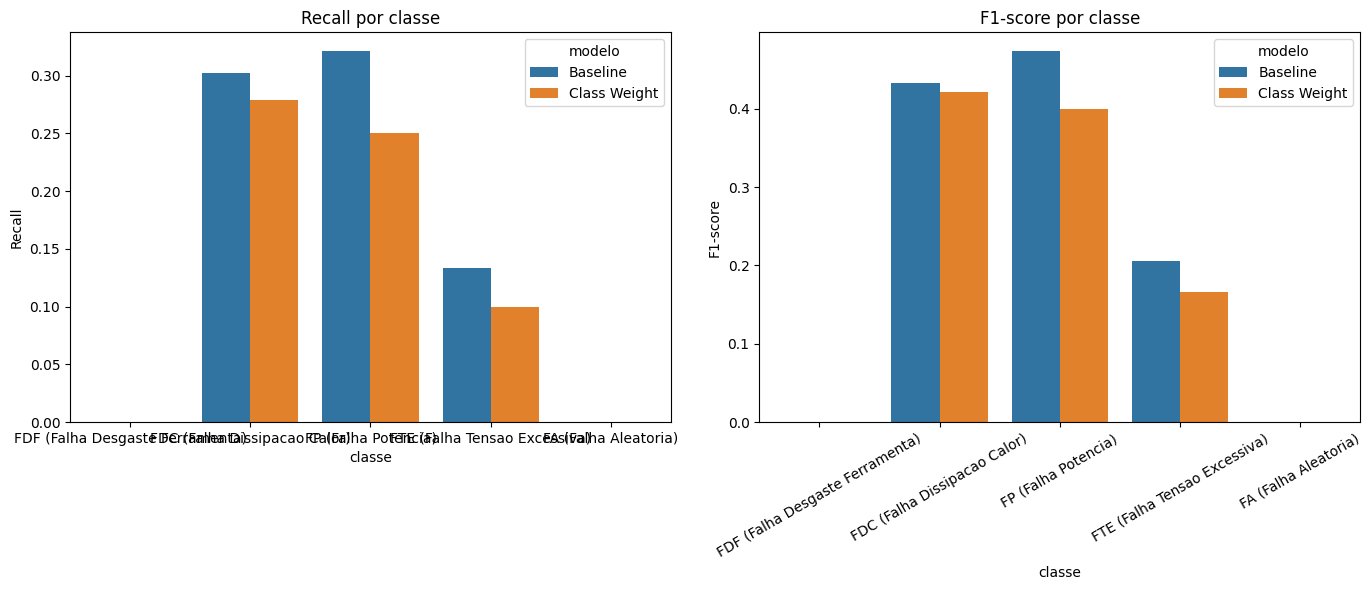

In [452]:
# ======================
# 5. Visualizar em gráfico
# ======================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=resultados, x="classe", y="recall", hue="modelo", ax=axes[0])
axes[0].set_title("Recall por classe")
axes[0].set_ylabel("Recall")

sns.barplot(data=resultados, x="classe", y="f1-score", hue="modelo", ax=axes[1])
axes[1].set_title("F1-score por classe")
axes[1].set_ylabel("F1-score")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Segunda rodada de tentativa

In [453]:
# Converte para arrays numpy
X_arr, y_arr = X.values, y.values

# Split estratificado multirrótulo
X_train, y_train, X_test, y_test = iterative_train_test_split(X_arr, y_arr, test_size=0.2)

In [454]:
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)


Treino: (17275, 8) (17275, 5)
Teste: (4319, 8) (4319, 5)


In [455]:
def treinar_avaliar(model, X_train, y_train, X_test, y_test, nome):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(
      y_test, y_pred,
      target_names=colunas_falhas,
      output_dict=True,
      zero_division=0
  )

    df_report = pd.DataFrame(report).transpose()
    df_report["modelo"] = nome
    return df_report

In [456]:
# Testar cenários diferentes


# Baseline
model1 = RandomForestClassifier(random_state=42)
res1 = treinar_avaliar(model1, X_train, y_train, X_test, y_test, "Baseline")

In [457]:
# Class weight balanced

model2 = RandomForestClassifier(random_state=42, class_weight="balanced")
res2 = treinar_avaliar(model2, X_train, y_train, X_test, y_test, "Class Weight")

In [458]:
resultados = pd.concat([res1, res2])

# Manter apenas classes de falha e métricas de interesse
resultados = resultados.reset_index().rename(columns={"index": "classe"})
resultados = resultados[resultados["classe"].isin(colunas_falhas)]

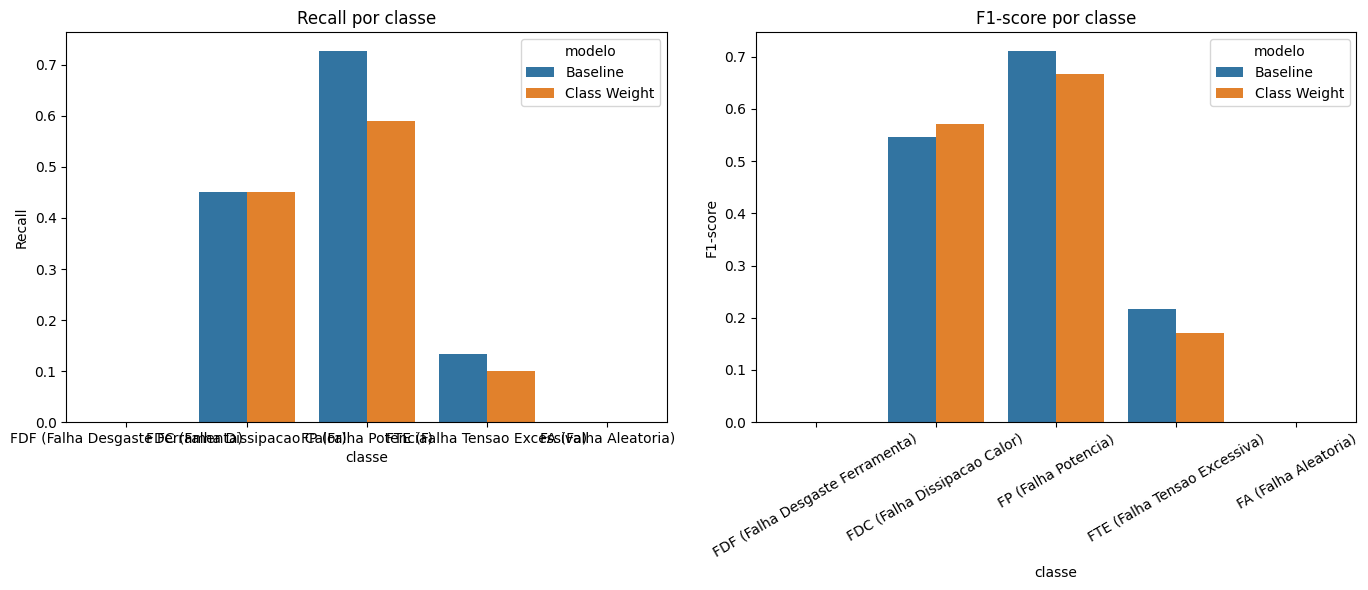

In [459]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=resultados, x="classe", y="recall", hue="modelo", ax=axes[0])
axes[0].set_title("Recall por classe")
axes[0].set_ylabel("Recall")

sns.barplot(data=resultados, x="classe", y="f1-score", hue="modelo", ax=axes[1])
axes[1].set_title("F1-score por classe")
axes[1].set_ylabel("F1-score")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Terceira rodada de tentativa


=== Fold 1 ===

=== Fold 2 ===

=== Fold 3 ===

=== Fold 4 ===

=== Fold 5 ===


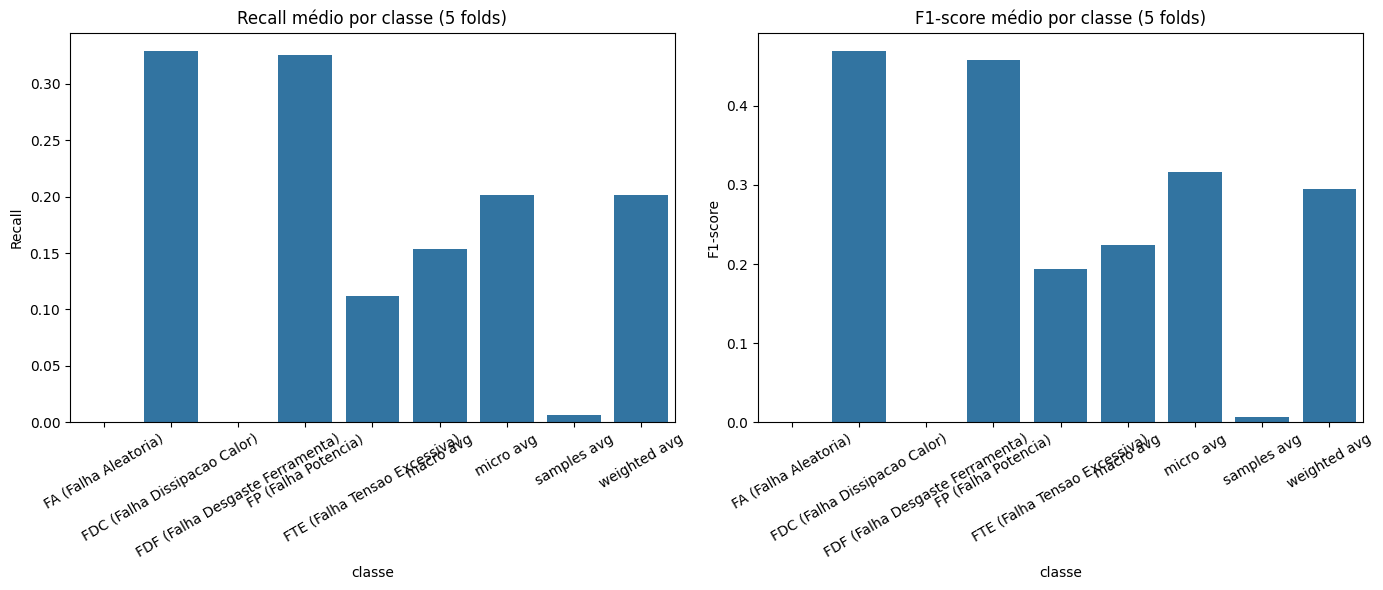

In [306]:
# Definir número de folds
kf = IterativeStratification(n_splits=5, order=1)

# Lista para armazenar resultados
resultados_folds = []

# Loop pelos folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"\n=== Fold {fold+1} ===")

    # Split
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Treinar modelo (exemplo: Random Forest)
    model = RandomForestClassifier(random_state=42, class_weight="balanced")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification report com nomes reais das classes
    report = classification_report(
        y_test, y_pred,
        target_names=colunas_falhas,
        output_dict=True,
        zero_division=0
    )

    # Converter em DataFrame
    df_report = pd.DataFrame(report).transpose().reset_index().rename(columns={"index":"classe"})
    df_report["fold"] = fold+1
    resultados_folds.append(df_report)

# Concatenar todos os folds
resultados_cv = pd.concat(resultados_folds)

# Calcular média por classe
resultados_medios = resultados_cv.groupby("classe")[["recall","f1-score"]].mean().reset_index()

# -------------------------------
# Gráficos Recall e F1-score médios
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=resultados_medios, x="classe", y="recall", ax=axes[0])
axes[0].set_title("Recall médio por classe (5 folds)")
axes[0].set_ylabel("Recall")
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(data=resultados_medios, x="classe", y="f1-score", ax=axes[1])
axes[1].set_title("F1-score médio por classe (5 folds)")
axes[1].set_ylabel("F1-score")
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

## Quarta rodada de tentativa

In [488]:
df_tratado.head(10)

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),tipo_L,tipo_M
0,0.326087,0.419753,0.0,0.254257,0.375000,0.768924,0,0,0,0,0,1,0
1,0.315217,0.333333,0.0,0.120376,0.686813,0.537849,0,0,0,0,0,1,0
3,0.608696,0.629630,0.0,0.244275,0.401099,0.019920,0,0,0,0,0,0,1
7,0.597826,0.740741,0.0,0.277158,0.390110,0.039841,0,0,0,0,0,1,0
9,0.347826,0.308642,0.0,0.276571,0.320055,0.043825,0,0,0,0,0,1,0
10,0.673913,0.666667,0.0,0.162067,0.567308,0.378486,0,0,0,0,0,1,0
11,0.336957,0.320988,0.0,0.146800,0.803571,0.071713,0,0,1,0,0,1,0
12,0.402174,0.370370,0.0,0.307105,0.340659,0.812749,0,0,0,0,0,1,0
14,0.413043,0.567901,0.0,0.162067,0.589286,0.326693,0,0,0,0,0,1,0
17,0.380435,0.506173,0.0,0.191427,0.445055,0.219124,0,0,0,0,0,1,0


In [483]:
colunas_falhas = [
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)"
]

# Features (X) = tudo menos os targets
X_full = df_tratado.drop(columns=colunas_falhas)  # garanta que removeu qtd_falhas
y_multi = df_tratado[colunas_falhas].astype(int)

# # Rótulos (y) = apenas a falha geral: rótulo binário
y_bin = (y_multi.sum(axis=1) > 0).astype(int)  # falha_geral

In [486]:
X_full.head(10)

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,tipo_L,tipo_M
0,0.326087,0.419753,0.0,0.254257,0.375000,0.768924,1,0
1,0.315217,0.333333,0.0,0.120376,0.686813,0.537849,1,0
3,0.608696,0.629630,0.0,0.244275,0.401099,0.019920,0,1
7,0.597826,0.740741,0.0,0.277158,0.390110,0.039841,1,0
9,0.347826,0.308642,0.0,0.276571,0.320055,0.043825,1,0
10,0.673913,0.666667,0.0,0.162067,0.567308,0.378486,1,0
11,0.336957,0.320988,0.0,0.146800,0.803571,0.071713,1,0
12,0.402174,0.370370,0.0,0.307105,0.340659,0.812749,1,0
14,0.413043,0.567901,0.0,0.162067,0.589286,0.326693,1,0
17,0.380435,0.506173,0.0,0.191427,0.445055,0.219124,1,0


In [487]:
y_bin.head(10)

,0
0,0
1,0
3,0
7,0
9,0
10,0
11,1
12,0
14,0
17,0


In [489]:
# Separando o dataset em treino e teste

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_full, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

print("Treino:", X1_train.shape, y1_train.shape)
print("Teste:", X1_test.shape, y1_test.shape)

Treino: (17332, 8) (17332,)
Teste: (4334, 8) (4334,)


In [516]:
ros = RandomOverSampler(sampling_strategy=0.05, random_state=42)
X1_tr_res, y1_tr_res = ros.fit_resample(X1_train, y1_train)

clf_bin = XGBClassifier(
    use_label_encoder=False, eval_metric="logloss",
    scale_pos_weight=(y1_train.value_counts()[0] / y1_train.value_counts()[1])
)
clf_bin.fit(X1_tr_res, y1_tr_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:29:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [517]:
print("Estágio 1 — Falha geral")
print(classification_report(y1_test, clf_bin.predict(X1_test), zero_division=0))

Estágio 1 — Falha geral
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4204
           1       0.57      0.65      0.61       130

    accuracy                           0.97      4334
   macro avg       0.78      0.82      0.80      4334
weighted avg       0.98      0.97      0.98      4334



In [521]:
xgb = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

# Grade de hiperparâmetros para testar
param_grid = {
    "n_estimators": [100, 300, 500],   # nº de árvores
    "max_depth": [3, 5, 7],           # profundidade das árvores
    "learning_rate": [0.01, 0.1, 0.2], # taxa de aprendizado
    "subsample": [0.8, 1.0],           # fração de amostras por árvore
    "colsample_bytree": [0.8, 1.0]     # fração de features por árvore
}

# GridSearchCV (usando Recall da classe 1 como métrica)
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="recall",   # ou "f1", "average_precision", etc.
    cv=3,               # 3-fold cross validation
    n_jobs=-1,          # usar todos os núcleos
    verbose=2
)

grid.fit(X1_tr_res, y1_tr_res)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor recall obtido:", grid.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:37:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1.0}
Melhor recall obtido: 0.7999999999999999


In [525]:
clf_bin = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=(y1_train.value_counts()[0] / y1_train.value_counts()[1]),
    colsample_bytree = 1.0,
    learning_rate = 0.2,
    max_depth = 5,
    n_estimators = 500,
    subsample = 1.0
)
clf_bin.fit(X1_tr_res, y1_tr_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:42:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [526]:
print("Estágio 1 — Falha geral")
print(classification_report(y1_test, clf_bin.predict(X1_test), zero_division=0))

Estágio 1 — Falha geral
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4204
           1       0.66      0.58      0.62       130

    accuracy                           0.98      4334
   macro avg       0.82      0.79      0.80      4334
weighted avg       0.98      0.98      0.98      4334



In [535]:
# Parte 2: treinar só em linhas com falha

df_falha = df_tratado.loc[y_bin == 1].copy()
X2 = df_falha.drop(columns=colunas_falhas)
y2 = df_falha[colunas_falhas].astype(int)

In [536]:
X2_train, y2_train, X2_test, y2_test = iterative_train_test_split(
    X2.values, y2.values, test_size=0.2
)

X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test  = pd.DataFrame(X2_test,  columns=X2.columns)
y2_train = pd.DataFrame(y2_train, columns=colunas_falhas)
y2_test  = pd.DataFrame(y2_test,  columns=colunas_falhas)


clf_multi = OneVsRestClassifier(RandomForestClassifier(random_state=42, n_estimators=300, n_jobs=-1))
clf_multi.fit(X2_train, y2_train)

from sklearn.metrics import classification_report
print("Estágio 2 — Tipos de falha (apenas entre falhas)")
print(classification_report(y2_test, clf_multi.predict(X2_test),
                            target_names=colunas_falhas, zero_division=0))

Estágio 2 — Tipos de falha (apenas entre falhas)
                                 precision    recall  f1-score   support

FDF (Falha Desgaste Ferramenta)       0.92      0.79      0.85        14
   FDC (Falha Dissipacao Calor)       0.92      0.98      0.95        45
            FP (Falha Potencia)       1.00      0.60      0.75        25
   FTE (Falha Tensao Excessiva)       0.94      0.85      0.89        34
           FA (Falha Aleatoria)       0.67      0.27      0.38        15

                      micro avg       0.92      0.77      0.84       133
                      macro avg       0.89      0.70      0.76       133
                   weighted avg       0.91      0.77      0.82       133
                    samples avg       0.78      0.78      0.78       133



In [538]:
# Tratando dados de teste

df_teste = pd.read_csv("sample_data/bootcamp_test.csv")

In [539]:
df_teste.head()

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta
0,35260,L53432,L,300.8,310.3,90.0,1538,36.1,198
1,35261,M19544,M,303.6,311.8,90.0,1421,44.8,101
2,35262,M16591,M,298.3,307.9,90.0,1485,42.0,117
3,35263,L51922,L,303.3,311.3,90.0,1592,33.7,14
4,35264,L51701,L,302.4,310.4,90.0,1865,23.9,129


In [541]:
linhas_com_nan = df_teste.isna().any(axis=1).sum()
print(f"Linhas com NaN: {linhas_com_nan}")

Linhas com NaN: 0


In [542]:
df_teste = df_teste.drop(columns=["id", "id_produto"])

In [543]:
df_teste.agg(["min", "max"])

,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta
min,H,295.3,305.8,80.605008,1168,4.6,0
max,M,304.4,313.7,94.769817,2861,76.6,251


In [544]:
df_teste = pd.get_dummies(df_teste, columns=["tipo"], drop_first=True)

In [545]:
df_teste.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,tipo_L,tipo_M
0,300.8,310.3,90.0,1538,36.1,198,True,False
1,303.6,311.8,90.0,1421,44.8,101,False,True
2,298.3,307.9,90.0,1485,42.0,117,False,True
3,303.3,311.3,90.0,1592,33.7,14,True,False
4,302.4,310.4,90.0,1865,23.9,129,True,False


In [546]:
# Normalizar colunas numéricas para [0,1]

normalizar = MinMaxScaler()
colunas_numericas = [
    "temperatura_ar",
    "temperatura_processo",
    "umidade_relativa",
    "velocidade_rotacional",
    "torque",
    "desgaste_da_ferramenta"
]

df_teste[colunas_numericas] = normalizar.fit_transform(df_teste[colunas_numericas])

In [547]:
df_teste.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,tipo_L,tipo_M
0,0.604396,0.569620,0.663263,0.218547,0.437500,0.788845,True,False
1,0.912088,0.759494,0.663263,0.149439,0.558333,0.402390,False,True
2,0.329670,0.265823,0.663263,0.187242,0.519444,0.466135,False,True
3,0.879121,0.696203,0.663263,0.250443,0.404167,0.055777,True,False
4,0.780220,0.582278,0.663263,0.411695,0.268056,0.513944,True,False


In [549]:
df_teste["tipo_L"] = df_teste["tipo_L"].astype(int)
df_teste["tipo_M"] = df_teste["tipo_M"].astype(int)

In [550]:
df_teste.head()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,tipo_L,tipo_M
0,0.604396,0.569620,0.663263,0.218547,0.437500,0.788845,1,0
1,0.912088,0.759494,0.663263,0.149439,0.558333,0.402390,0,1
2,0.329670,0.265823,0.663263,0.187242,0.519444,0.466135,0,1
3,0.879121,0.696203,0.663263,0.250443,0.404167,0.055777,1,0
4,0.780220,0.582278,0.663263,0.411695,0.268056,0.513944,1,0


In [557]:
# Parte 1
y_pred_bin = clf_bin.predict(df_teste)

In [559]:
# Parte 2: identificando as linhas onde a predição rotulou com rótulo de falha

indices_com_falha = np.where(y_pred_bin == 1)[0]
X_com_falha = df_teste.iloc[indices_com_falha]

In [563]:
# Parte 3

y_pred_multi = clf_multi.predict(X_com_falha)

In [571]:
# Parte 4

df_final = df_teste.copy()
df_final["Falha_Geral"] = y_pred_bin
df_final.loc[indices_com_falha, colunas_falhas] = y_pred_multi

for col in colunas_falhas:
    df_final[col] = 0

In [572]:
df_final.head(20)

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,tipo_L,tipo_M,Falha_Geral,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0.604396,0.569620,0.663263,0.218547,0.437500,0.788845,1,0,0,0,0,0,0,0
1,0.912088,0.759494,0.663263,0.149439,0.558333,0.402390,0,1,0,0,0,0,0,0
2,0.329670,0.265823,0.663263,0.187242,0.519444,0.466135,0,1,0,0,0,0,0,0
3,0.879121,0.696203,0.663263,0.250443,0.404167,0.055777,1,0,0,0,0,0,0,0
4,0.780220,0.582278,0.663263,0.411695,0.268056,0.513944,1,0,0,0,0,0,0,0
5,0.571429,0.518987,0.663263,0.135263,0.573611,0.836653,0,0,0,0,0,0,0,0
6,0.263736,0.493671,0.663263,0.160662,0.645833,0.760956,0,0,0,0,0,0,0,0
7,0.923077,0.873418,0.663263,0.098641,0.645833,0.641434,1,0,0,0,0,0,0,0
8,0.516484,0.481013,0.663263,0.265800,0.438889,0.211155,0,1,0,0,0,0,0,0
9,0.230769,0.316456,0.663263,0.216775,0.416667,0.203187,0,1,0,0,0,0,0,0


In [573]:
print(df_final["Falha_Geral"].value_counts())

Falha_Geral
0    6964
1     209
Name: count, dtype: int64


In [575]:
df_final[df_final["Falha_Geral"] == 1].sample(10)

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,tipo_L,tipo_M,Falha_Geral,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
5936,0.890110,0.759494,0.663263,0.076787,0.797222,0.135458,1,0,1,0,0,0,0,0
6206,0.747253,0.683544,0.663263,0.060248,0.916667,0.617530,1,0,1,0,0,0,0,0
1537,0.703297,0.506329,0.663263,0.068517,0.883333,0.442231,0,1,1,0,0,0,0,0
4838,0.758242,0.582278,0.663263,0.119315,0.713889,0.035857,1,0,1,0,0,0,0,0
4919,0.857143,0.670886,0.663263,0.095688,0.716667,0.454183,1,0,1,0,0,0,0,0
6971,0.549451,0.658228,0.663263,0.106911,0.684722,0.601594,0,1,1,0,0,0,0,0
119,0.725275,0.607595,0.663263,0.096279,0.888889,0.338645,1,0,1,0,0,0,0,0
6311,0.879121,0.708861,0.663263,0.041347,0.736111,0.131474,1,0,1,0,0,0,0,0
823,0.813187,0.594937,0.663263,0.108092,0.516667,0.039841,1,0,1,0,0,0,0,0
1152,0.285714,0.506329,0.663263,0.099232,0.930556,0.123506,1,0,1,0,0,0,0,0
